# Cryptocurrency Clusters

In [49]:
# Read in the data

import pandas as pd
df = pd.read_csv('./Resources/crypto_data.csv')
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [50]:
# Data Clean Up

df_trading = df[(df['IsTrading']==True)]
df_trading1 = df_trading.drop('IsTrading',axis=1)
# df_trading1.isnull().sum() # Count number of rows that have a null value
df_trading2 = df_trading1.dropna()
df_trading3 = df_trading2[(df_trading2['TotalCoinsMined']>0)]
df_trading4 = df_trading3.drop(['CoinName','Unnamed: 0'],1)
# df_trading4.info() # Show dataframe information and data types
df_trading4['TotalCoinSupply'] = df_trading4['TotalCoinSupply'].astype(str).astype(float)
# df_trading4.info() # Show dataframe information and data types
print(f'The dimensions of the dataframe are currently: {df_trading4.shape}')

The dimensions of the dataframe are currently: (532, 4)


In [51]:
# Convert categorical field to numeric

df_trading5 = pd.get_dummies(df_trading4)
print(f'After running the get_dummies method, the dimensions of the dataframe are now: {df_trading5.shape}')
a = df_trading5.shape[0] * df_trading5.shape[1]
print(f'The number of elements in this dataframe are: {a}')
print('The starting point perplexity for tsne is typically N^(1/2)')
print(f'The number of elements is N and N^(1/2) is: {round(a**0.5)}')

After running the get_dummies method, the dimensions of the dataframe are now: (532, 98)
The number of elements in this dataframe are: 52136
The starting point perplexity for tsne is typically N^(1/2)
The number of elements is N and N^(1/2) is: 228


In [52]:
df_trading5

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Scale the large values to prevent skewing the model weightings

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_trading5)
scaled_data = scaler.transform(df_trading5)
# scaled_data[0:1]
print('The dataset has been standardized so that columns that contain larger values are not unduly influencing the outcome.')

The dataset has been standardized so that columns that contain larger values are not unduly influencing the outcome.


In [54]:
# Instantiate a PCA that explains 90% of the variance

from sklearn.decomposition import PCA

pca = PCA(n_components=0.90, svd_solver='full')
pca_transformed_data = pca.fit_transform(scaled_data)

print(f'The number of features for the PCA has been reduced from {df_trading5.shape[1]} to {pca_transformed_data.shape[1]}, this accomodates 90% of the explained variance.')
b = pca_transformed_data.shape[0] * pca_transformed_data.shape[1]
print(f'The number of elements in this dataframe are: {b}')
print('The starting point perplexity for tsne is typically N^(1/2)')
print(f'The number of elements is N and N^(1/2) is: {round(b**0.5)}')

The number of features for the PCA has been reduced from 98 to 74, this accomodates 90% of the explained variance.
The number of elements in this dataframe are: 39368
The starting point perplexity for tsne is typically N^(1/2)
The number of elements is N and N^(1/2) is: 198


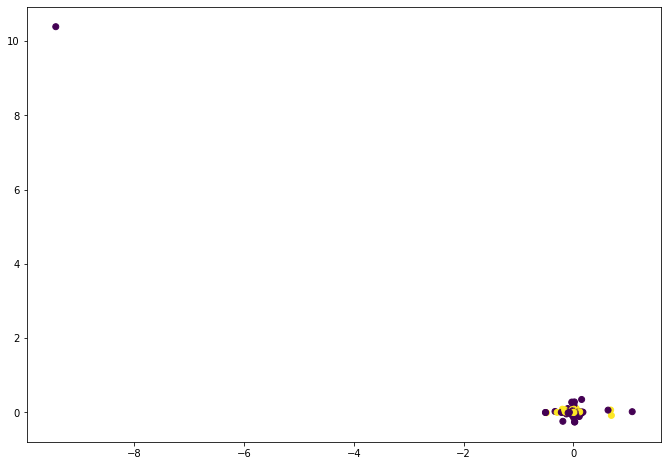

In [55]:
# Create a tsne to visualize the clusters

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2,n_iter=250,perplexity=198,learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

df_trading5['x'] = transformed_features[:,0]
df_trading5['y'] = transformed_features[:,1]

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(25)
ax = fig.add_subplot(121)
# ax.tick_params(axis='x', colors='white')  #setting up X-axis tick color to white for dark notebook backgrounds
# ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to white for dark notebook backgrounds

# plt.scatter(df_trading5['x'], df_trading5['y']) # run before k-means model completed
plt.scatter(df_trading5['x'], df_trading5['y'], c=df_crypto_pca['class']) # can be run after k-means model is completed
plt.show()

In [ ]:
# Run the Cluster Analysis with k-Means

pca = PCA(n_components=2)
crypto_pca = pca.fit_transform(scaled_data)

df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2"]
)


from sklearn.cluster import KMeans

# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(25)
ax = fig.add_subplot(121)
# ax.xaxis.label.set_color('white') #setting up X-axis label color to white for dark notebook backgrounds
# ax.yaxis.label.set_color('white') #setting up Y-axis label color to white for dark notebook backgrounds
# ax.tick_params(axis='x', colors='white') #setting up X-axis tick color to white for dark notebook backgrounds
# ax.tick_params(axis='y', colors='white') #setting up Y-axis tick color to white for dark notebook backgrounds

title_obj = plt.title('Elbow Curve') #get the title property handler
# plt.getp(title_obj) #print out the properties of title
plt.getp(title_obj, 'text') #print out the 'text' property for title
# plt.setp(title_obj, color='white') #set the color of title to white for dark notebook backgrounds

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\srobi\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


### Recommendations

There are also 3 clusters that the cryptocurrencies can be grouped into based on the k-Means clustering method.